In [1]:
import tkinter as tk

In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

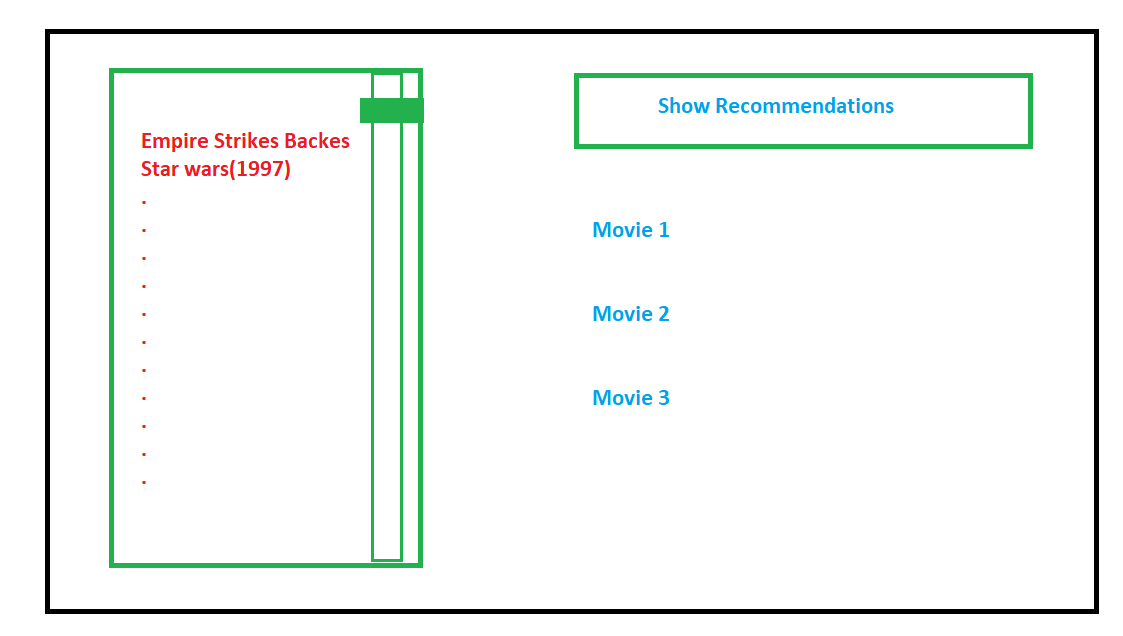

In [4]:
from PIL import Image
Image.open('GUI.png')

In [ ]:
df = pd.read_csv('ml-100k/u.data',sep='\t', names=['user_id','item_id','rating','ts'])
cols = "item_id|title| release date | video release date |\
              IMDb URL | unknown | Action | Adventure | Animation |\
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |\
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |\
              Thriller | War | Western".split('|')
movies = pd.read_csv('ml-100k/u.item',sep='|',names=cols)
data = pd.merge(df.drop('ts',axis=1),movies[['item_id','title']], on='item_id')
rate_count =  data.groupby('title')['rating'].count()
df_pivot = data.pivot_table(index='user_id',columns='title',values='rating')

app = tk.Tk()
app.geometry('450x350')
app.title('Recommendation System')

listbox = tk.Listbox(app, height=15, width=30, bg='white',fg='black')
listbox.place(x=20,y=20)

for i,t in enumerate(data['title'].unique()):
    listbox.insert(i+1, t)

def recommend():
    inp = listbox.get(listbox.curselection())
    sim_df = pd.DataFrame(df_pivot.corrwith(df_pivot[inp]),columns=['corr'])
    sim_df['count'] = rate_count
    recom = sim_df[(sim_df['count']>100)].sort_values('corr',ascending=False)
    recom.drop(inp,axis=0, inplace=True)
    recommended = recom.index[:4]
    result1.set(recommended[0])
    result2.set(recommended[1])
    result3.set(recommended[2])
    result4.set(recommended[3])
#     print(inp)
#     print(recommended)

tk.Button(app,text='Show Recommendations', command=recommend,bg='blue',fg='white').place(x=250,y=30)

result1 = tk.Variable(app)
result1.set('.')
tk.Label(app, textvariable=result1).place(x=250,y=100)

result2 = tk.Variable(app)
result2.set('.')
tk.Label(app, textvariable=result2).place(x=250,y=130)

result3 = tk.Variable(app)
result3.set('.')
tk.Label(app, textvariable=result3).place(x=250,y=160)

result4 = tk.Variable(app)
result4.set('.')
tk.Label(app, textvariable=result4).place(x=250,y=190)

app.mainloop()